In [4]:
from tumor import Tumor
import numpy as np
import math

In [5]:
# Set global constants 
T_SPAN = [0, 100] # Treament period time span
TTR = range(1, 7)
T0 = range(2, 21)

# List of treatment levels
treatment_levels = ["Max", "Moderate", "Low", "None"]

In [6]:
# Create Tumor objects 
aggressive = Tumor(k=800, r1=1.2, r2=1.0, dmax=1.5, d2=0.7)
slow_growing = Tumor(k=250, r1=0.6, r2=0.5, dmax=2.5, d2=0.4)

In [ ]:
# Iterate through all combinations of TTR and T0, then select the top 10 solutions with the lowest time to elimination
def solutions(cancer):
    treatment_dict = {}
    for ttr in TTR:
        for t0 in T0:
            cancer_res = cancer.solve_IVP(adaptive=True, ttr=ttr, t0=t0, t_span=T_SPAN)
            res_summary = cancer.calculate_burden_elimination(cancer_res)
            treatment_dict[(ttr, t0)] = res_summary

    solutions = []
    for cycle, res in treatment_dict.items():
        if res[0] < cancer.k and res[1] != np.inf:
            solutions.append([cycle, res])

    sorted_solutions = sorted(solutions, key=lambda x: x[1][1])
    sorted_solutions = sorted_solutions[:10]
    
    return sorted_solutions

In [8]:
# Solve for all treatment combinations 
aggressive_sols = solutions(aggressive)
slow_growing_sols = solutions(slow_growing)

In [9]:
# Select realistic treatment schedules from optimal solutions 
aggressive_sols
ttr_aggr = 5
t0_aggr = 2

slow_growing_sols
ttr_slow = 3
t0_slow = 17

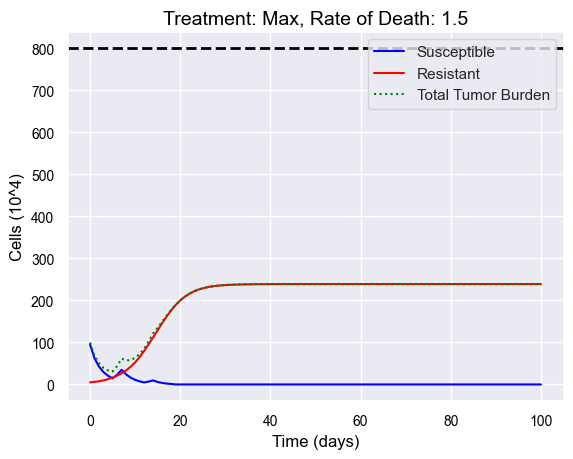

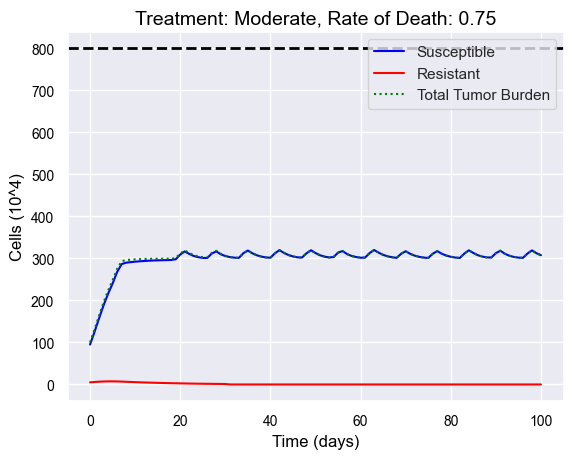

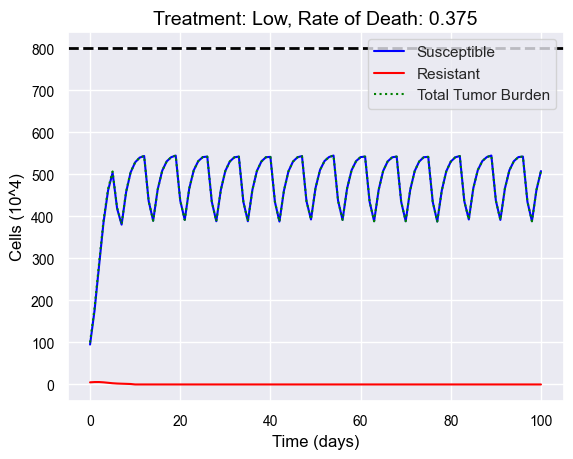

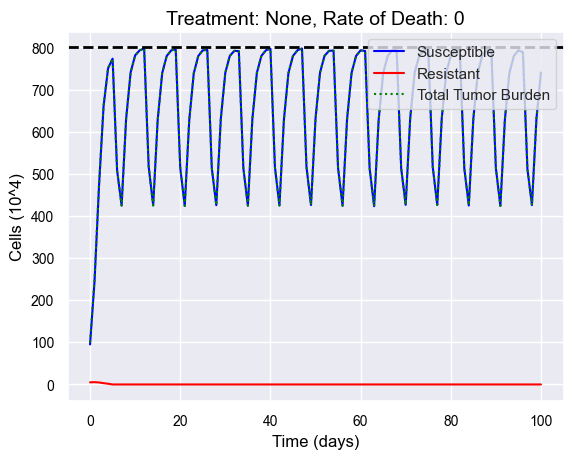

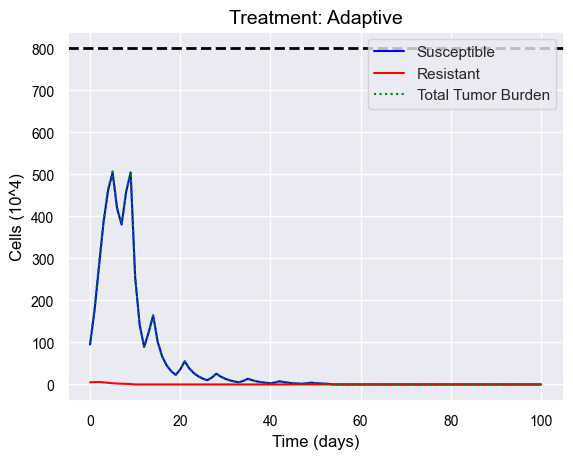

In [10]:
# Solve and plot aggressive treatments 
# Fixed treatment
for treatment, levels in zip(aggressive.treatments, treatment_levels):
    sol = aggressive.solve_IVP(adaptive=False, ttr=ttr_aggr, t0=t0_aggr, t_span=T_SPAN, dtr=treatment)
    aggressive.plot_res(sol, f'{levels}, Rate of Death: {treatment}')

# Adaptive treatment
sol = aggressive.solve_IVP(adaptive=True, ttr=ttr_aggr, t0=t0_aggr, t_span=T_SPAN)
aggressive.plot_res(sol, "Adaptive") 

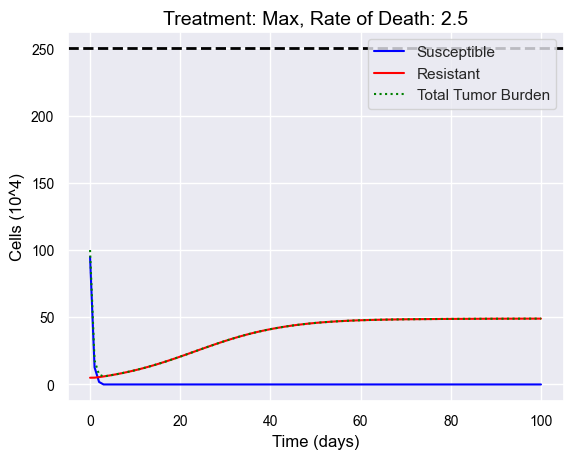

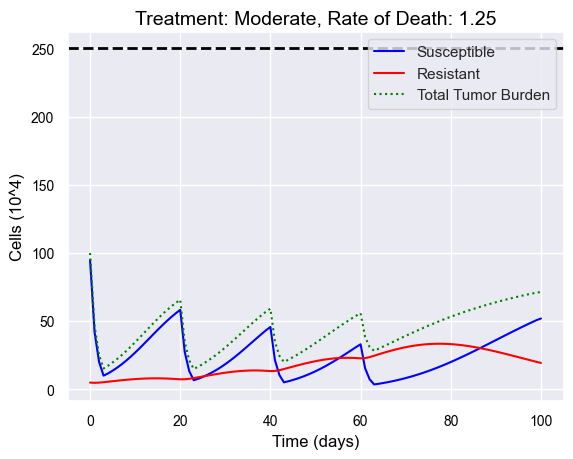

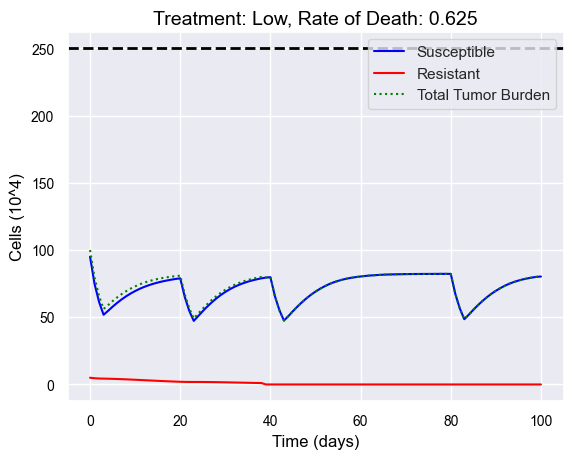

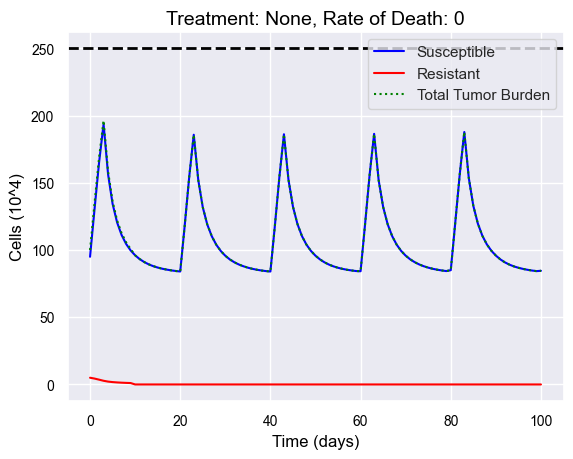

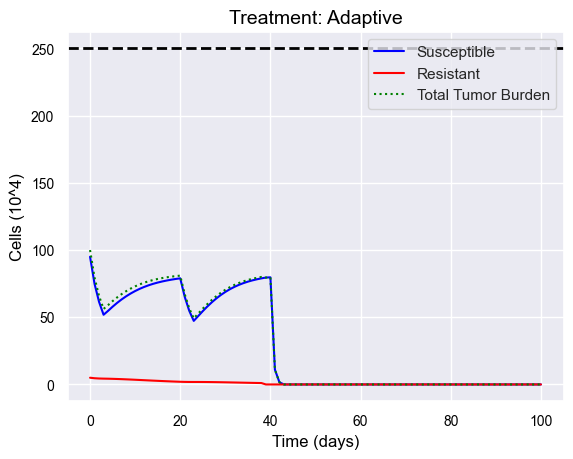

In [11]:
# Solve and plot slow-growing treatments 
# Fixed treatment
for treatment, levels in zip(slow_growing.treatments, treatment_levels):
    sol = slow_growing.solve_IVP(adaptive=False, ttr=ttr_slow, t0=t0_slow, t_span=T_SPAN, dtr=treatment)
    slow_growing.plot_res(sol, f'{levels}, Rate of Death: {treatment}')

# Adaptive treatment
sol = slow_growing.solve_IVP(adaptive=True, ttr=ttr_slow, t0=t0_slow, t_span=T_SPAN)
slow_growing.plot_res(sol, "Adaptive") 